# Overview Exercises

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

***Has the network latency gone up since we switched internet service providers?***

Revised question:

- Has network latency changed since switching internet service providers?

H0:

- Network latency has not changed since switching internet service providers

Ha:

- Network latency has changed since switching internet service providers

True positive: Said there was a difference and there was

- Our test confirmed that the change after switching was indeed not due to chance (was statistically significant)

True negative: Failed to reject the null hypothesis when it was indeed false

- Our test confirmed that the change was indeed due to chance when it was and was indeed statistically insignificant

Type I Error (False Positive Rate): Said there was a difference where there wasn't

- Our test disproved the null hypothesis of no change but the change was actually due to chance and the null should not have been rejected

Type II Error (False Negative): Failing to reject null hypothesis when it is false

- Our test failed to reject the null hypothesis of no change when we should have rejected it


***Is the website redesign any good?***

Revised question:

- Have click through rates changed since redesigning the website?

H0:

- Click through rates have not changed since redesigning the website

Ha:

- Click through rates have changed since redesigning the website

True positive: Said there was a difference and there was

- Our test confirmed that the change after redesign was indeed not due to chance

True negative: Rejected the null hypothesis when it was indeed false

- Our test confirmed that the change was indeed due to chance 

Type I Error (False Positive Rate): Said there was a difference where there wasn't

- Our test disproved the null hypothesis of no change but the change was actually due to chance and the null should not have been rejected

Type II Error (False Negative): Failing to reject null hypothesis when it is false

- Our test failed to reject the null hypothesis of no change when we should have rejected it


***Is our television ad driving more sales?***

Revised question:

- Has sales revenue changed since we deployed our TV ad?

H0:

- Sales revenue has not changed since deploying TV ad

Ha:

- Sales revenue has changed since deploying TV ad

True positive: Said there was a difference and there was

- Our test confirmed that the change after switching was indeed not due to chance

True negative: Rejected the null hypothesis when it was indeed false

- Our test confirmed that the change was indeed due to chance 

Type I Error (False Positive Rate): Said there was a difference where there wasn't

- Our test disproved the null hypothesis of no change but the change was actually due to chance and the null should not have been rejected

Type II Error (False Negative): Failing to reject null hypothesis when it is false

- Our test failed to reject the null hypothesis of no change when we should have rejected it since there was a statistically significant difference

# T-Test Exercises 

In [1]:
# imports

from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import viz # curriculum visualization examples

import seaborn as sns
from pydataset import data

***For all tests below, an alpha of 0.05 will be used to measure statistical significance.***

### 1.

**Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.**

Formula to manually calculate t-statistic for this case:

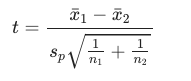

Formula to calculate pooled standard deviation to use in formula above:

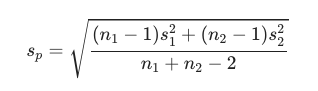

Will need to use 2 sample t test.

**H0: There is no difference in average time it takes to sell homes in two different offices**

**Ha: There is a difference in average time it takes to sell homes in two different offices**

In [2]:
#create and assign variables for all needed parts of above formula
xbar1 = 90
s1 = 15
n1 = 40

xbar2 = 100
s2 = 20
n2 = 50

degf = n1 + n2 - 2

In [3]:
# calculate pooled standard deviation

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

17.956702977389302

In [4]:
# calculate test statistic

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [5]:
# calculate p value

p = stats.t(degf).cdf(t) * 2
p

0.01020985244923939

***Because p < 0.05, we can reject the null hypothesis and can say that the difference in average time that it takes to sell homes in the two different offices is statistically significant***

In [6]:
# another method

t, p = (stats.ttest_ind_from_stats(xbar1, s1, n1, xbar2, s2, n2, equal_var = False))
t, p
# Conclusion doesn't change

(-2.7091418459143854, 0.00811206270346016)

### 2.

Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [7]:
# load the mpg dataset
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [8]:
mpg.groupby('year').cyl.count()

year
1999    117
2008    117
Name: cyl, dtype: int64

##### **Hypotheses:**

**H0: there is no difference in average fuel efficiency in cars made in 2008 vs those made in 1999**

**Ha: there is a difference in average fuel efficiency in cars made in 2008 vs those made in 1999**

Two sample t-test is needed. Two tailed.


In [9]:
# add a column for average fuel efficiency that is the average of city and hwy mpg
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [10]:
# create pandas series for each group using boolean masks
Oeight = mpg[mpg.year == 2008].avg_mpg
Oeight.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: avg_mpg, dtype: float64

In [11]:
ninety_nine = mpg[mpg.year == 1999].avg_mpg
ninety_nine.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: avg_mpg, dtype: float64

##### **Test assumptions:**

<AxesSubplot:>

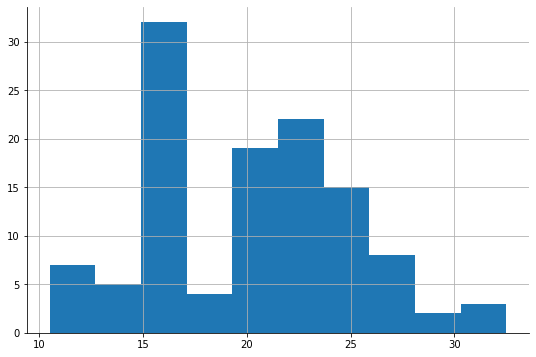

In [12]:
# plot distributions to see if normal

Oeight.hist()

In [13]:
Oeight.size

117

<AxesSubplot:>

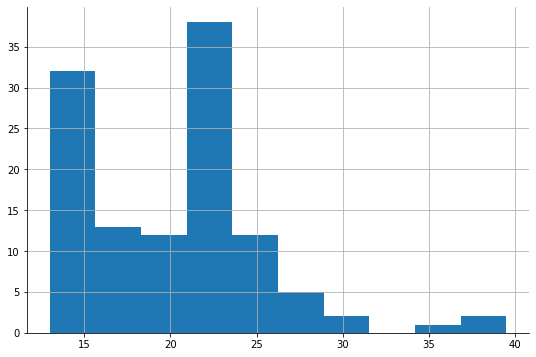

In [14]:
ninety_nine.hist()

In [15]:
# normal enough due to large number of observations

In [16]:
# check variances
Oeight.var()

24.097480106100797

In [17]:
ninety_nine.var()

27.122605363984682

In [18]:
# close enough

##### Compute Test Statistic and p value:

In [19]:
# compute test statistic

t, p = stats.ttest_ind(Oeight, ninety_nine, equal_var = True) # not necessary to include equal_var argument 
# here since same as default, but adding to remember argument exists
t, p

(-0.21960177245940962, 0.8263744040323578)

In [20]:
t, p = stats.ttest_ind(Oeight, ninety_nine, equal_var = False) # checking to copare difference
t, p

(-0.21960177245940962, 0.8263750772060638)

In [21]:
Oeight.mean()

20.076923076923077

In [22]:
ninety_nine.mean()

20.22222222222222

##### Conclusion: 

***We fail to reject the null hypothesis and conclude that there is not a statistically significant difference between the means of the two groups***

In [23]:
# double check answer with Mann-Whitney's test

In [60]:
stats.mannwhitneyu(Oeight, ninety_nine, alternative = 'two-sided')

MannwhitneyuResult(statistic=7010.5, pvalue=0.7489868536015144)

In [57]:
help(stats.mannwhitneyu)

Help on function mannwhitneyu in module scipy.stats.stats:

mannwhitneyu(x, y, use_continuity=True, alternative=None)
    Compute the Mann-Whitney rank test on samples x and y.
    
    Parameters
    ----------
    x, y : array_like
        Array of samples, should be one-dimensional.
    use_continuity : bool, optional
            Whether a continuity correction (1/2.) should be taken into
            account. Default is True.
    alternative : {None, 'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis.
        The following options are available (default is None):
    
          * None: computes p-value half the size of the 'two-sided' p-value and
            a different U statistic. The default behavior is not the same as
            using 'less' or 'greater'; it only exists for backward compatibility
            and is deprecated.
          * 'two-sided'
          * 'less': one-sided
          * 'greater': one-sided
    
        Use of the None opt

In [25]:
# p value for non-parametric test is also above 0.05

#### Are compact cars more fuel-efficient than the average car?

In [26]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [27]:
mpg.groupby('class').cyl.count()

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
Name: cyl, dtype: int64

##### Hypotheses:

This will be one sample t test and single tailed

H0: Average mpg of compact cars is less than or equal to that of all other cars

Ha: Average mpg of compact cars is greater than that of all other cars

In [28]:
# create pandas series for each group using boolean masks

compact = mpg[mpg['class'] == 'compact'].avg_mpg
compact.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mpg, dtype: float64

In [29]:
all_cars = mpg.avg_mpg
all_cars.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mpg, dtype: float64

In [30]:
# look at averages to get an idea before running test

compact.mean()

24.21276595744681

In [31]:
all_cars.mean()

20.14957264957265

##### Test assumptions:

<AxesSubplot:>

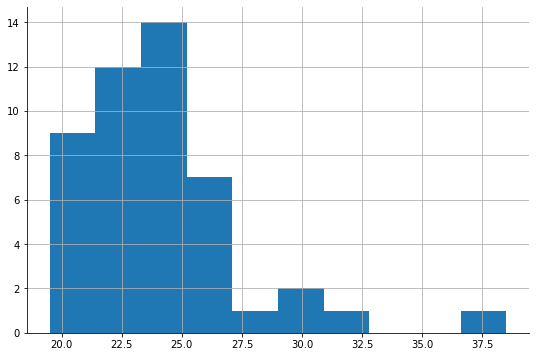

In [32]:
compact.hist()

In [33]:
compact.size

47

In [34]:
# close enough to normal and has more than 30 observations

<AxesSubplot:>

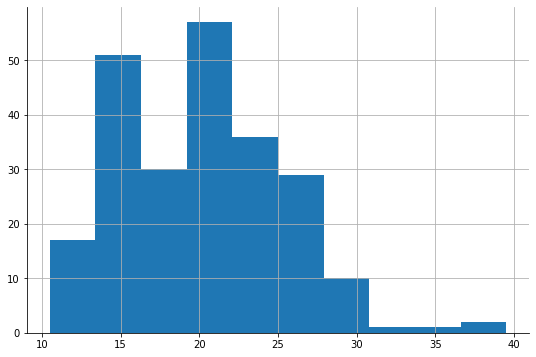

In [35]:
all_cars.hist()

In [36]:
all_cars.size

234

In [37]:
# close enough to normal and has more than 30 observations

##### Compute Test Statistic and p value:

In [38]:
t, p = stats.ttest_1samp(compact, all_cars.mean())
t, p/2

(7.896888573132535, 2.0992818971585668e-10)

In [39]:
#help(stats.ttest_1samp)

##### Conclusion: 

***We reject the null hypothesis and have evidence to support that there is a statistically significant different in average fuel efficiency between compact cars and all other cars and that they have better average fuel efficiency.***

In [40]:
# investigate necessary args for Wilcoxon signed rank test
#help(stats.wilcoxon)

In [41]:
# run non-parametric test and compare results

#stats.wilcoxon(compact, all_cars)

# this didn't work for this problem, arrays passed in must be of same length and it doesn't accept a
# pop mean like the stats.ttest_1samp() does, would need to look more into how to set things up to 
# run this test

#### Do manual cars get better gas mileage than automatic cars?

##### Hypotheses:

Two sample t test with single tail

H0: Gas mileage of manual cars is less than or equal to that of automatic cars

Ha: Manual cars get better gas mileage than automatic cars

In [42]:
# create series for each group using boolean masks
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [43]:
# create new column for is_auto
mpg['is_auto'] = mpg.trans.str.contains("auto")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,is_auto
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True


In [44]:
auto = mpg[mpg.is_auto == True].avg_mpg
auto.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: avg_mpg, dtype: float64

In [45]:
manual = mpg[mpg.is_auto == False].avg_mpg
manual.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: avg_mpg, dtype: float64

##### Test Assumptions:

- Independent? Yes, they are two different subsets of data
- Normally distributed or sufficient observations? Yes (see histograms and observation counts below)
- Equal variances? See variance calculations below
    - Not sure on this one, will run with both arguments and do non parametric

<AxesSubplot:>

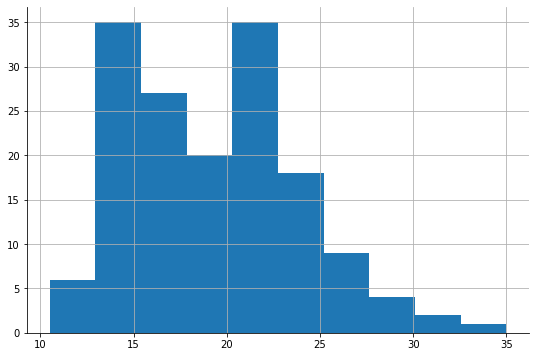

In [46]:
auto.hist()

In [47]:
auto.size

157

<AxesSubplot:>

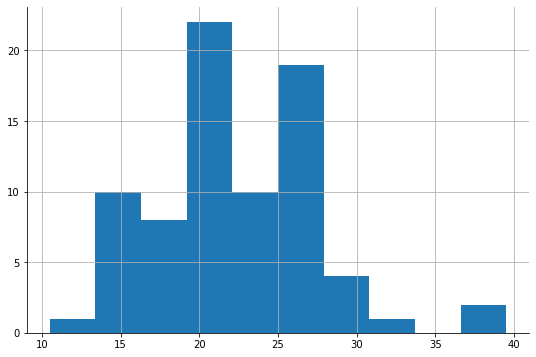

In [48]:
manual.hist()

In [49]:
manual.size

77

In [50]:
auto.var()

21.942777233382337

In [51]:
manual.var()

26.635167464114826

##### Compute test statistic and p value:

In [52]:
t, p = stats.ttest_ind(manual, auto, equal_var = True)
t, p/2

(4.593437735750014, 3.5771872005728416e-06)

In [53]:
t, p = stats.ttest_ind(manual, auto, equal_var = False)
t, p/2

(4.443514012903071, 8.976124499958965e-06)

In [63]:
stats.mannwhitneyu(manual, auto, alternative = 'greater')

MannwhitneyuResult(statistic=8193.5, pvalue=4.9297998930308745e-06)

In [55]:
manual.mean()

22.227272727272727

In [56]:
auto.mean()

19.130573248407643

##### Conclusion:

***We reject the null hypothesis and have evidence that there is a statistically significant difference in mean fuel efficiency between manual and automatic cars and that manual cars have better fuel efficiency on average***

# Correlation Exercises

### 1.

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [72]:
df = pd.read_csv("~/Desktop/TelcoTableau.csv")  
df.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'phone_service', 'internet_service', 'contract_type', 'payment_type',
       'monthly_charges', 'total_charges', 'churn', 'monthly_tenure',
       'rounded_tenure', 'is_female', 'has_churned', 'has_phone',
       'has_internet', 'has_phone_and_internet', 'partner_dependents',
       'start_date', 'average_monthly_charges', 'validate_calc',
       'contract_type_name', 'phone_service_type', 'internet_type',
       'service_type', 'has_churned_summable', 'if_female_summable', 'is_male',
       'part_dep_name'],
      dtype='object')

In [93]:
df.shape

(7043, 31)

In [97]:
# drop all nulls
df = df.dropna()
df.shape

(7032, 31)

In [98]:
# Take a look at data
# sns.pairplot(df)
# too many columns and most are not numerical

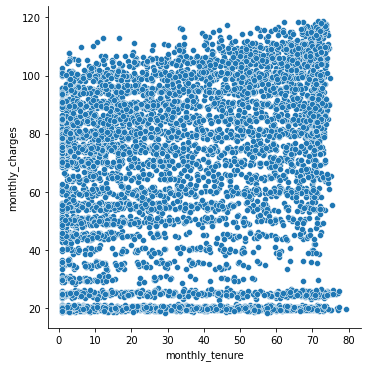

In [99]:
sns.relplot(x='monthly_tenure', y='monthly_charges', data=df)
plt.show()

In [100]:
df[['monthly_tenure', 'monthly_charges']].corr()

,monthly_tenure,monthly_charges
monthly_tenure,1.000000,0.246502
monthly_charges,0.246502,1.000000


In [118]:
r, p = stats.pearsonr(df.monthly_tenure, df.monthly_charges)
r, p

(0.24650174436990646, 7.767854624218193e-98)

***Monthly tenure does not strongly correlate with monthly charges***

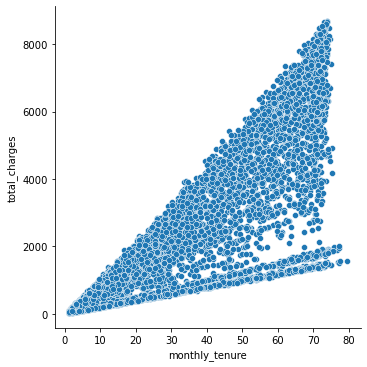

In [102]:
# monthly tenure with total charges

sns.relplot(x='monthly_tenure', y='total_charges', data=df)
plt.show()

In [103]:
df[['monthly_tenure', 'total_charges']].corr()

,monthly_tenure,total_charges
monthly_tenure,1.000000,0.826161
total_charges,0.826161,1.000000


In [104]:
r, p = stats.pearsonr(df.monthly_tenure, df.total_charges)
r, p

(0.8261605364104811, 0.0)

***Monthly tenure does have a strong correlation with total charges***

In [108]:
# control for phone and internet service

p_and_i = df[df.service_type == 'phone_and_internet']
p_and_i.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,average_monthly_charges,validate_calc,contract_type_name,phone_service_type,internet_type,service_type,has_churned_summable,if_female_summable,is_male,part_dep_name
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,65.6,True,1 Year,One Line,DSL,phone_and_internet,0,1,0,partner_and_dependents
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,59.9,True,Month-to-Month,Two or More Lines,DSL,phone_and_internet,0,0,1,no_partners_no_dependents
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,73.9,True,Month-to-Month,One Line,Fiber Optic,phone_and_internet,1,0,1,no_partners_no_dependents
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,98.0,True,Month-to-Month,One Line,Fiber Optic,phone_and_internet,1,0,1,partner_only
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,83.9,True,Month-to-Month,One Line,Fiber Optic,phone_and_internet,1,1,0,partner_only


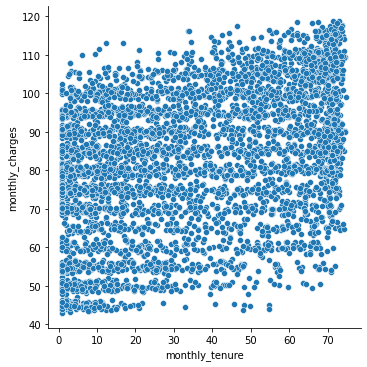

In [111]:
# lets look at tenure and monthly charges first
sns.relplot(x='monthly_tenure', y='monthly_charges', data=p_and_i)
plt.show()

In [112]:
p_and_i[['monthly_tenure', 'monthly_charges']].corr()

,monthly_tenure,monthly_charges
monthly_tenure,1.000000,0.443312
monthly_charges,0.443312,1.000000


In [113]:
r, p = stats.pearsonr(p_and_i.monthly_tenure, p_and_i.monthly_charges)
r, p

(0.44331175895165253, 8.331544730202107e-232)

***Correlation is still very weak for only phone and internet customers***

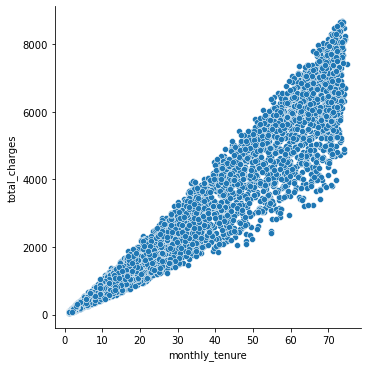

In [115]:
# now lets look at tenure and total charges
sns.relplot(x='monthly_tenure', y='total_charges', data=p_and_i)
plt.show()

In [116]:
p_and_i[['monthly_tenure', 'total_charges']].corr()

,monthly_tenure,total_charges
monthly_tenure,1.000000,0.958769
total_charges,0.958769,1.000000


In [117]:
r, p = stats.pearsonr(p_and_i.monthly_tenure, p_and_i.total_charges)
r, p

(0.95876919644389, 0.0)

***The correlation becomes even stronger when controlling for phone and internet customers***

### 2.

Use the employees database.

   - Is there a relationship between how long an employee has been with the company and their salary?

   - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

### 3.

Use the sleepstudy data. Is there a relationship between days and reaction time?